In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import extract_uses.main

extract_uses.main.main()

('Folder already exists. Assumption: Already processed, then ignoring...', 'grenoble/')


In [34]:
import pandas as pd

import loaders
import extract_uses.utils as utils

city_ref = 'grenoble'
activities_shp = city_ref+"/full_activities.shp"
residential_shp = city_ref+"/full_residential.shp"

bbox = utils.getBoundingBox(activities_shp)

geo_graph = loaders.load_graph(city_ref, bbox)
centrality_df = loaders.load_centrality(city_ref, geo_graph)
pois_df = loaders.load_extracted_osm_pois(activities_shp)
pois_residential_df = loaders.load_extracted_osm_pois(residential_shp)
all_pois_df = pd.concat([pois_df, pois_residential_df])
categories_kde_dict = loaders.load_grid_kde(city_ref, all_pois_df)

TypeError: get_all_kde_dict() takes exactly 3 arguments (1 given)

Querying locally for `['kde_shop', 'kde_residential', 'kde_commercial/industrial', 'kde_leisure/amenity', 'kde_global']`
`['kde_shop', 'kde_residential', 'kde_commercial/industrial', 'kde_leisure/amenity', 'kde_global']` is/are not stored locally. Determining it/them through `get_all_kde_dict` method


Querying locally for `['centrality']`
Found ['centrality'] stored locally


('Bounding box:', [45.11334367251151, 5.5764359, 45.24389538600425, 5.9025706])
Querying locally for `['nodes', 'edges']`
Found ['nodes', 'edges'] stored locally


In [35]:
with pd.HDFStore('/home/martibosch/urbansprawl/urban_analysis/hdfs_store/grenoble.h5', 'a') as store:
    print(store.keys())

['/centrality', '/edges', '/global', '/kde', '/kde_grid', '/kde_residential', '/kde_shop', '/nodes', '/kde_commercial/industrial', '/kde_leisure/amenity']


In [19]:
import measures
import kde

x = range(10, 100, 10)
y = []

for l in x:
    y.append(measures.land_use_mix(kde.get_categories_kde_dict(all_pois_df, bbox, gridsize=l)))

In [14]:
categories_kde_dict = kde.get_categories_kde_dict(all_pois_df, bbox, gridsize=100)
y_100 = measures.land_use_mix(categories_kde_dict)

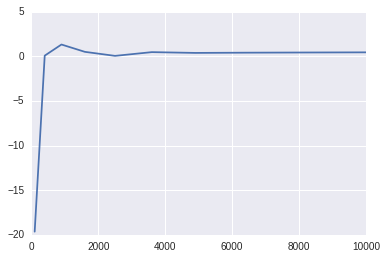

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(np.square(x), y)

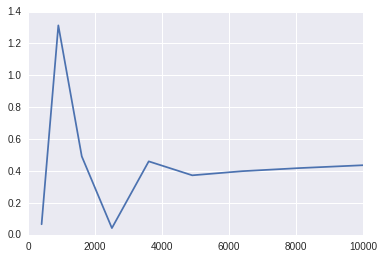

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(np.square(x)[1:], y[1:])